In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
attack = pd.read_csv('globalterrorismdb.csv',encoding='ISO-8859-1', low_memory=False)
attack.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
attack = attack[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
attack['casualities'] = attack['Killed'] + attack['Wounded']

In [3]:
# Selecting top 15 countries
attack_most_freq = attack[(attack.Country == 'Iraq') | (attack.Country == 'Pakistan') | (attack.Country == 'Afghanistan') | (attack.Country == 'India') | (attack.Country == 'Colombia') | (attack.Country == 'Philippines') | (attack.Country == 'Peru') | (attack.Country == 'El Salvador') | (attack.Country == 'United Kingdom') | (attack.Country == 'Turkey') | (attack.Country == 'Somalia') | (attack.Country == 'Nigeria') | (attack.Country == 'Thailand') | (attack.Country == 'Yemen') | (attack.Country == 'Spain')]
attack_most_freq = attack_most_freq.drop(["Summary","Motive"],axis = 1)
#attack_most_freq.mean()
attack_most_freq = attack_most_freq.fillna(attack_most_freq.mean())
#attack_most_freq = attack_most_freq.dropna()
attack_most_freq.isnull().sum()

Year             0
Month            0
Day              0
Country          0
Region           0
city           403
latitude         0
longitude        0
AttackType       0
Killed           0
Wounded          0
Target         287
Group            0
Target_type      0
Weapon_type      0
casualities      0
dtype: int64

In [4]:
attack_most_freq = attack_most_freq.dropna()
attack_most_freq.isnull().sum()
#attack_most_freq.shape

Year           0
Month          0
Day            0
Country        0
Region         0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Group          0
Target_type    0
Weapon_type    0
casualities    0
dtype: int64

In [5]:
attack_most_freq

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,casualities
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.000000,0.000000,Employee,Unknown,Journalists & Media,Unknown,1.000000
26,1970,1,21,Philippines,Southeast Asia,Quezon City,14.674280,121.057495,Bombing/Explosion,0.000000,0.000000,JUSMAG HQ,Unknown,Government (Diplomatic),Explosives,0.000000
39,1970,1,31,Philippines,Southeast Asia,Bamban,15.675051,120.331618,Unknown,0.000000,1.000000,Seaman,New People's Army (NPA),Military,Unknown,1.000000
96,1970,3,0,Philippines,Southeast Asia,Manila,14.596051,120.978666,Bombing/Explosion,0.000000,0.000000,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,0.000000
103,1970,3,3,Spain,Western Europe,Unknown,24.269852,35.529608,Hostage Taking (Kidnapping),0.000000,0.000000,"Garrigues, permanent spanish delegaet to Unesco",1st of May Group,Government (General),Unknown,0.000000
150,1970,3,24,Philippines,Southeast Asia,Angeles,15.153002,120.591942,Unknown,1.000000,0.000000,officer,Unknown,Military,Unknown,1.000000
169,1970,4,2,Philippines,Southeast Asia,Mabalacat City,15.185916,120.541870,Unknown,2.000000,0.000000,Airmen,New People's Army (NPA),Military,Unknown,2.000000
210,1970,4,21,Philippines,Southeast Asia,Cauayan,24.269852,35.529608,Bombing/Explosion,36.000000,0.000000,Philippines Airlines Aircraft,Unknown,Airports & Aircraft,Explosives,36.000000
226,1970,4,25,Turkey,Middle East & North Africa,Istanbul,41.106178,28.689863,Bombing/Explosion,0.000000,0.000000,EL AL Office,Palestinians,Airports & Aircraft,Explosives,0.000000
317,1970,6,2,Philippines,Southeast Asia,Roxas,11.586558,122.753716,Bombing/Explosion,1.000000,12.000000,Philipines Airliner Flight,Unknown,Airports & Aircraft,Explosives,13.000000


In [6]:
attack_most_freq_country = pd.get_dummies(attack_most_freq['Country'])
df_new_1 = pd.concat([attack_most_freq, attack_most_freq_country], axis=1)
# Create a set of dummy variables from the attack_type variable
attack_most_freq_attackType = pd.get_dummies(attack_most_freq['AttackType'])
#df_new_2 = pd.concat([attack_most_freq_country, attack_most_freq_attackType], axis=1)
df_new_2 = df_new_1.join(attack_most_freq_attackType)
attack_most_freq_Region = pd.get_dummies(attack_most_freq['Region'])
df_new_3 = df_new_2.join(attack_most_freq_Region)
df_new_3 = df_new_3.drop(["city","Target","Group"],axis = 1)
df_new_4 = df_new_3.drop(["Target_type","Weapon_type"],axis = 1)
df_new_4.shape

(117659, 42)

In [7]:
df_new_4

,Year,Month,Day,Country,Region,latitude,longitude,AttackType,Killed,Wounded,...,Hostage Taking (Kidnapping),Unarmed Assault,Unknown,Central America & Caribbean,Middle East & North Africa,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
2,1970,1,0,Philippines,Southeast Asia,15.478598,120.599741,Assassination,1.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
26,1970,1,21,Philippines,Southeast Asia,14.674280,121.057495,Bombing/Explosion,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
39,1970,1,31,Philippines,Southeast Asia,15.675051,120.331618,Unknown,0.000000,1.000000,...,0,0,1,0,0,0,0,1,0,0
96,1970,3,0,Philippines,Southeast Asia,14.596051,120.978666,Bombing/Explosion,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
103,1970,3,3,Spain,Western Europe,24.269852,35.529608,Hostage Taking (Kidnapping),0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,1
150,1970,3,24,Philippines,Southeast Asia,15.153002,120.591942,Unknown,1.000000,0.000000,...,0,0,1,0,0,0,0,1,0,0
169,1970,4,2,Philippines,Southeast Asia,15.185916,120.541870,Unknown,2.000000,0.000000,...,0,0,1,0,0,0,0,1,0,0
210,1970,4,21,Philippines,Southeast Asia,24.269852,35.529608,Bombing/Explosion,36.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
226,1970,4,25,Turkey,Middle East & North Africa,41.106178,28.689863,Bombing/Explosion,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
317,1970,6,2,Philippines,Southeast Asia,11.586558,122.753716,Bombing/Explosion,1.000000,12.000000,...,0,0,0,0,0,0,0,1,0,0


In [8]:
y = df_new_4['casualities']
df_new_5 = df_new_4.drop('casualities',axis=1)
#X = df_new_5

In [9]:
df_new_6 = df_new_5.drop(["Country","AttackType","Region"],axis = 1)
X = df_new_6

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = X.astype('float64')
X = sc.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

mse_rf = {}

for n in range(45, 51):
    rfr = RandomForestRegressor(n_estimators=n)
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_test)
    mse_rf[n] = mean_squared_error(y_test, y_pred)

In [93]:
mse_rf

{45: 16.427902030241132,
 46: 14.516698287864665,
 47: 15.192704400306779,
 48: 16.49450668293242,
 49: 17.21758661792637,
 50: 15.991782385952748}

Text(0.5, 1.0, 'Random Forest')

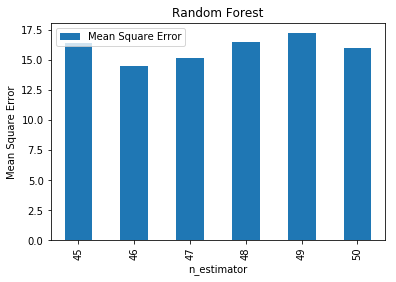

In [149]:
col={'Mean Square Error': mse_rf}
df = pd.DataFrame(data=col, index=mse_rf)
df.plot(kind='bar')
plt.xlabel('n_estimator')
plt.ylabel('Mean Square Error')
plt.title('Random Forest')

In [95]:
rmse_rf

{45: 4.053134839879021,
 46: 3.8100785146588074,
 47: 3.8977819847070436,
 48: 4.061342965440424,
 49: 4.149407984029333,
 50: 3.9989726663172815}

In [151]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

mse_ridge = {}

for n in [1e-2, 1, 2, 3]:
    ridge = Ridge(alpha=n)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse_ridge[n] = mean_squared_error(y_test, y_pred)

In [152]:
mse_ridge

{0.01: 58.38350258512882,
 1: 58.3827584466613,
 2: 58.38200685195814,
 3: 58.38125531787054}

In [141]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

mse_lasso = {}

for n in [1e-2, 1, 2, 3]:
    lasso = Lasso(alpha=n)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse_lasso[n] = mean_squared_error(y_test, y_pred)

In [153]:
mse_lasso

{0.01: 58.27752006232824,
 1: 44.66772387337986,
 2: 38.974452422986005,
 3: 41.60872784311572}

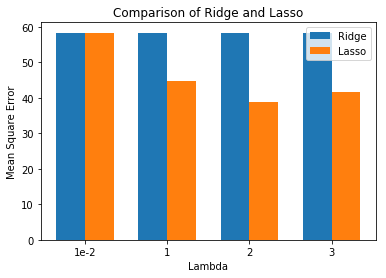

<Figure size 1080x1080 with 0 Axes>

In [150]:
index = np.arange(4)
bar_width = 0.35

fig, ax = plt.subplots()
ridge = ax.bar(index, mse_ridge.values(), bar_width, label="Ridge")
lasso = ax.bar(index+bar_width, mse_lasso.values(), bar_width, label="Lasso")

ax.set_xlabel('Lambda')
ax.set_ylabel('Mean Square Error')
ax.set_title('Comparison of Ridge and Lasso')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["1e-2", "1", "2", "3"])
ax.legend()

plt.figure(figsize=(15,15))
plt.show()